# DSLabs functions

In [14]:
%run "scripts/dslabs_functions.py"


# Data functions

In [1]:
%run "scripts/data_functions.py"


data_functions loaded


# Load

In [2]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_0_2024_agg_time_agg_input.csv'


file_tag = "Google Merch Store 2024-2025"


# test_data=True
test_data=False


data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

 
target='Sessions'
series: Series = data[target]

test_split_threshold = 0.7

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2024-01-04 to 2025-03-05
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         427 non-null    float64
 1   Seven-day active users           427 non-null    float64
 2   28-day active users              427 non-null    float64
 3   Events per session               427 non-null    float64
 4   Add to baskets                   427 non-null    float64
 5   Checkouts                        427 non-null    float64
 6   E-commerce purchases             427 non-null    float64
 7   Average purchase revenue         427 non-null    float64
 8   Purchase revenue                 427 non-null    float64
 9   Average session duration         427 non-null    float64
 10  ARPU                             427 non-null    float64
 11  ARPPU                            427 non-null    float64
 12  Vie

# Differentiation - no diff

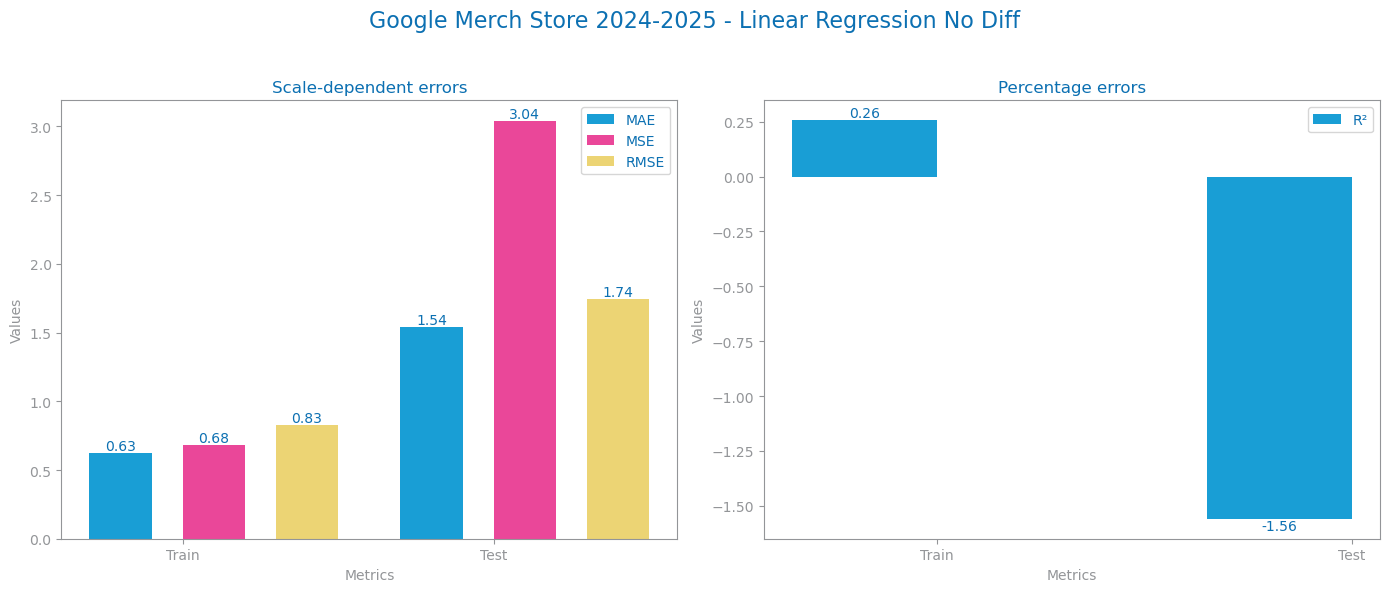

<Figure size 640x480 with 0 Axes>

In [3]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


data_0 = data.copy()

# Split the data into train and test sets
train_0, test_0 = series_train_test_split(data_0, trn_pct=test_split_threshold)


# Ensure no data leakage
assert not set(train_0.index).intersection(set(test_0.index)), "Data leakage detected: Train and test sets overlap."


# Prepare the training and testing data from dataframes with features and target
# trnX_0 = train_0.drop(columns=[target])
# trnY_0 = train_0[target]
# tstX_0 = test_0.drop(columns=[target])
# tstY_0 = test_0[target]


# Prepare the training and testing data using the time index as the feature
trnX_0 = arange(len(train_0)).reshape(-1, 1)
trnY_0 = train_0[target].to_numpy()
tstX_0 = arange(len(train_0), len(data_0)).reshape(-1, 1)
tstY_0 = test_0[target].to_numpy()


# Fit the linear regression model
model_0 = LinearRegression()
model_0.fit(trnX_0, trnY_0)

# Predict the training and testing data
prd_trn_0 = Series(model_0.predict(trnX_0), index=train_0.index)
prd_tst_0 = Series(model_0.predict(tstX_0), index=test_0.index)

# Plot the forecasting evaluation
plot_single_model_evaluation(train_0[target], test_0[target], prd_trn_0, prd_tst_0, title=f"{file_tag} - Linear Regression No Diff")
savefig(f"images/{file_tag}_linear_regression_eval_no_diff.png")

## no differentiating plot

<Axes: xlabel='Date', ylabel='Sessions'>

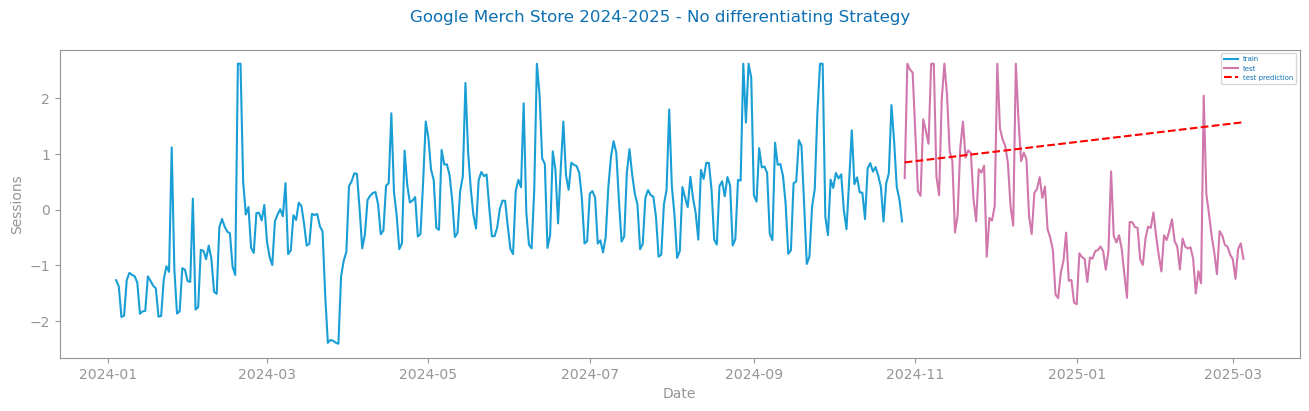

In [4]:
plot_forecasting_series(
    train_0[target],
    test_0[target],
    prd_tst_0,
    title=f"{file_tag} - No differentiating Strategy",
    xlabel='Date',
    ylabel=target,
)

# Differentiation 1

## Differentiation1 strategy Application

In [5]:

def apply_strategy_1(df):

    df_copy=df.copy()
    df_diff = df_copy.diff(periods=1).dropna()

    return df_diff


data_1=apply_strategy_1(data)

series_1: Series = data_1[target]

data_1



,Sessions,Seven-day active users,28-day active users,Events per session,Add to baskets,Checkouts,E-commerce purchases,Average purchase revenue,Purchase revenue,Average session duration,...,Sessions cpc,Sessions cpm,Sessions email,Sessions organic,Sessions other,Sessions referral,season,commercial_season,is_weekend,is_holiday
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-05,-0.113015,0.000000,0.000000,0.042815,0.199884,-0.022807,0.185963,1.354205,0.639359,0.501248,...,-0.199823,0.0,-0.134505,-0.243014,0.0,-0.029745,0.000000,0.000000,0.000000,0.0
2024-01-06,-0.548420,0.000000,0.000000,-1.088881,-1.148356,-0.627201,-1.190164,-2.010421,-1.428265,-1.370698,...,0.070526,0.0,-0.269009,-0.863117,0.0,-0.232013,0.000000,-0.719137,2.213594,0.0
2024-01-07,0.023793,0.000000,0.000000,1.015277,0.176369,0.079826,0.297541,-0.308034,0.039894,-0.397402,...,0.000000,0.0,0.010347,0.033519,0.0,0.029745,0.000000,0.000000,0.000000,0.0
2024-01-08,0.636452,0.000000,0.000000,-0.749115,0.427204,0.193862,0.223156,0.300802,0.218386,1.164689,...,-0.011754,0.0,0.372474,1.122891,0.0,0.267707,0.000000,0.000000,-2.213594,0.0
2024-01-09,0.133239,0.061382,0.000000,0.646589,0.282190,0.627201,0.595082,1.422379,0.924691,0.183335,...,0.082280,0.0,-0.206930,-0.175975,0.0,-0.023796,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,-0.084464,-0.011287,-0.003702,-1.475767,-0.685878,-0.957907,-0.892623,-0.701034,-0.797437,-2.465579,...,-0.552452,0.0,-0.237970,-1.189929,0.0,-0.672242,0.951685,0.719137,2.213594,0.0
2025-03-02,-0.352131,-0.015628,-0.007933,0.909342,0.070547,0.228073,0.371926,-0.317311,0.142536,1.940415,...,0.329120,0.0,0.062079,0.351951,0.0,-0.041643,0.000000,0.000000,0.000000,0.0
2025-03-03,0.534144,-0.071196,-0.022565,1.156898,0.732910,1.003522,0.409119,1.126042,0.605164,1.217219,...,0.540698,0.0,0.320742,1.298866,0.0,0.886408,0.000000,0.000000,-2.213594,0.0


## Differentiation evaluate

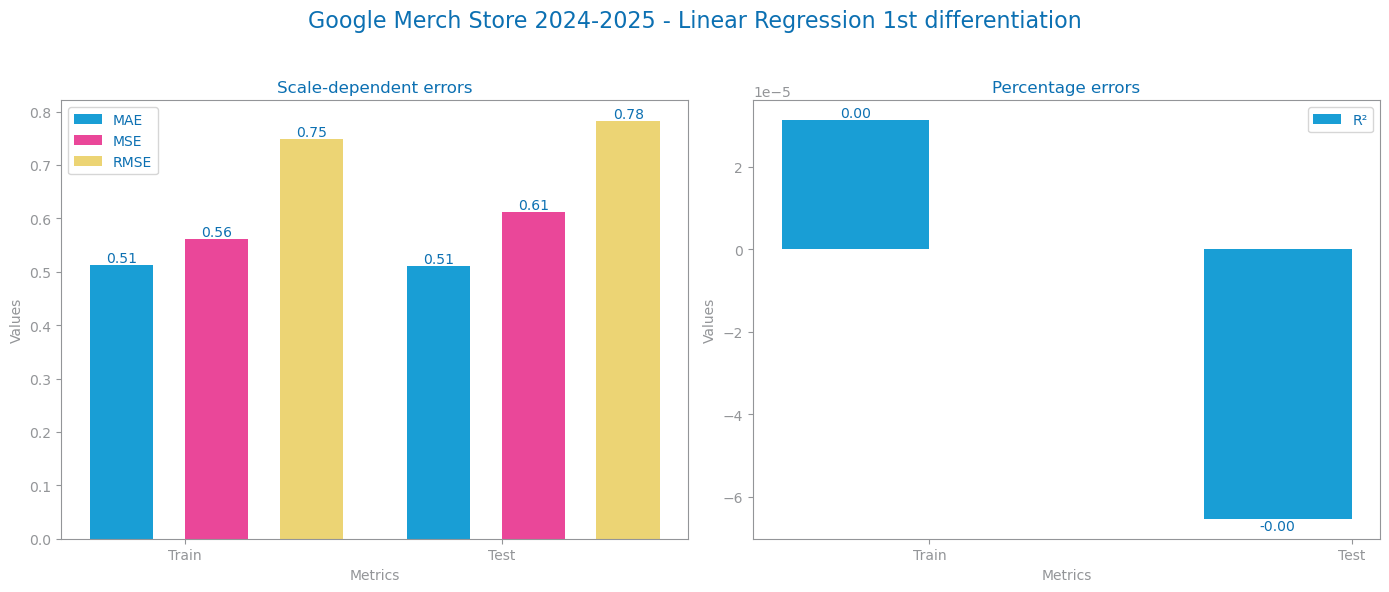

<Figure size 640x480 with 0 Axes>

In [6]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


# Split the data into train and test sets
train_1, test_1 = series_train_test_split(data_1, trn_pct=test_split_threshold)

# Ensure no data leakage
assert not set(train_1.index).intersection(set(test_1.index)), "Data leakage detected: Train and test sets overlap."


# Prepare the training and testing data using the time index as the feature
trnX_1 = arange(len(train_1)).reshape(-1, 1)
trnY_1 = train_1[target].to_numpy()
tstX_1 = arange(len(train_1), len(data_1)).reshape(-1, 1)
tstY_1 = test_1[target].to_numpy()


# Fit the linear regression model
model_1 = LinearRegression()
model_1.fit(trnX_1, trnY_1)

# Predict the training and testing data
prd_trn_1 = Series(model_1.predict(trnX_1), index=train_1.index)
prd_tst_1 = Series(model_1.predict(tstX_1), index=test_1.index)

# Plot the forecasting evaluation
plot_single_model_evaluation(train_1[target], test_1[target], prd_trn_1, prd_tst_1, title=f"{file_tag} - Linear Regression 1st differentiation")
savefig(f"images/{file_tag}_linear_regression_diff1.png")

## Differentiation1 Plot

<Axes: xlabel='Date', ylabel='Sessions'>

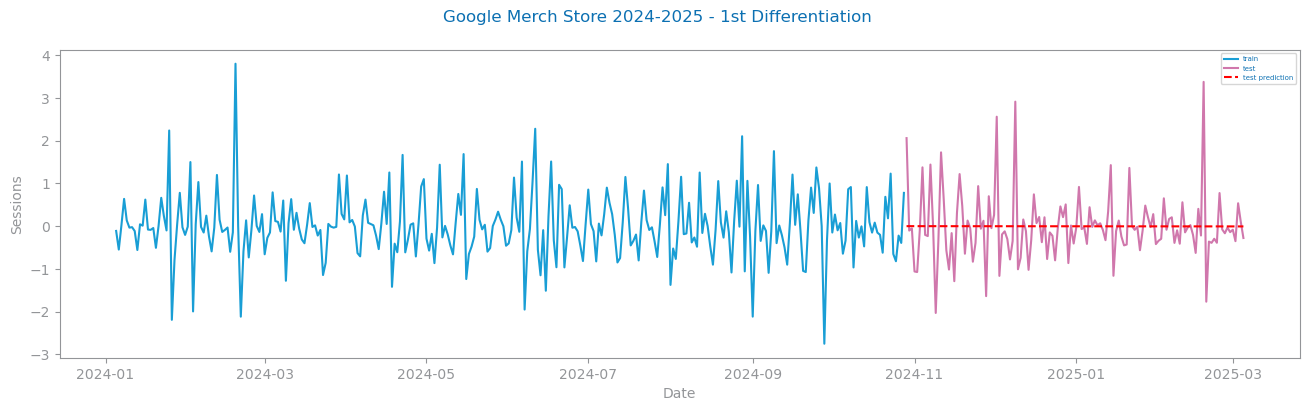

In [7]:
plot_forecasting_series(
    train_1[target],
    test_1[target],
    prd_tst_1,
    title=f"{file_tag} - 1st Differentiation ",
    xlabel='Date',
    ylabel=target,
)

# Differentiation 2 

# Differentiation 2 Strategy Application

In [8]:

def apply_strategy_2(df):

    df_copy=df.copy()
    df_diff = df_copy.diff(periods=2).dropna()

    return df_diff


data_2=apply_strategy_2(data)

series_2: Series = data_2[target]

data_2

,Sessions,Seven-day active users,28-day active users,Events per session,Add to baskets,Checkouts,E-commerce purchases,Average purchase revenue,Purchase revenue,Average session duration,...,Sessions cpc,Sessions cpm,Sessions email,Sessions organic,Sessions other,Sessions referral,season,commercial_season,is_weekend,is_holiday
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-06,-0.661435,0.000000,0.000000,-1.046066,-0.948471,-0.650009,-1.004201,-0.656216,-0.788906,-0.869450,...,-0.129297,0.0,-0.403514,-1.106131,0.0,-0.261758,0.000000,-0.719137,2.213594,0.0
2024-01-07,-0.524627,0.000000,0.000000,-0.073603,-0.971987,-0.547376,-0.892623,-2.318455,-1.388371,-1.768100,...,0.070526,0.0,-0.258663,-0.829598,0.0,-0.202268,0.000000,-0.719137,2.213594,0.0
2024-01-08,0.660245,0.000000,0.000000,0.266162,0.603573,0.273688,0.520697,-0.007232,0.258279,0.767287,...,-0.011754,0.0,0.382821,1.156410,0.0,0.297452,0.000000,0.000000,-2.213594,0.0
2024-01-09,0.769691,0.061382,0.000000,-0.102527,0.709394,0.821063,0.818237,1.723181,1.143077,1.348024,...,0.070526,0.0,0.165544,0.946915,0.0,0.243911,0.000000,0.000000,-2.213594,0.0
2024-01-10,0.097550,0.267157,0.000000,0.213645,0.203804,0.444743,0.260348,-0.297875,0.065653,0.122957,...,0.000000,0.0,-0.165544,0.192735,0.0,-0.136828,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,-0.226030,-0.083062,-0.009520,-2.056987,-0.803457,-0.798256,-0.371926,-0.528110,-0.344225,-2.603080,...,-0.411400,0.0,-0.320742,-1.483221,0.0,-0.957796,0.951685,0.719137,2.213594,0.0
2025-03-02,-0.436594,-0.026916,-0.011635,-0.566424,-0.615331,-0.729834,-0.520697,-1.018345,-0.654901,-0.525164,...,-0.223332,0.0,-0.175891,-0.837978,0.0,-0.713886,0.951685,0.719137,2.213594,0.0
2025-03-03,0.182013,-0.086825,-0.030498,2.066241,0.803457,1.231595,0.781045,0.808731,0.747699,3.157634,...,0.869818,0.0,0.382821,1.650817,0.0,0.844765,0.000000,0.000000,-2.213594,0.0


## Differentation 2 evaluate

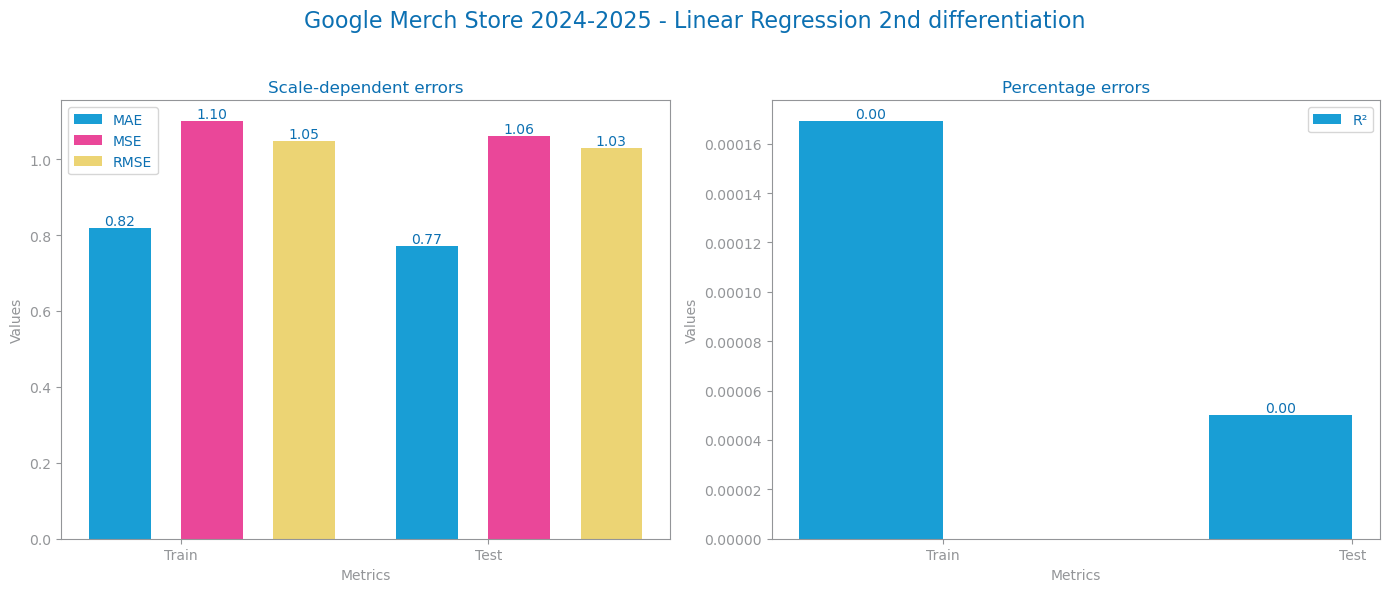

<Figure size 640x480 with 0 Axes>

In [9]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


# Split the data into train and test sets
train_2, test_2 = series_train_test_split(data_2, trn_pct=test_split_threshold)

# Ensure no data leakage
assert not set(train_2.index).intersection(set(test_2.index)), "Data leakage detected: Train and test sets overlap."


# Prepare the training and testing data using the time index as the feature
trnX_2 = arange(len(train_2)).reshape(-1, 1)
trnY_2 = train_2[target].to_numpy()
tstX_2 = arange(len(train_2), len(data_2)).reshape(-1, 1)
tstY_2 = test_2[target].to_numpy()


# Fit the linear regression model
model_2 = LinearRegression()
model_2.fit(trnX_2, trnY_2)

# Predict the training and testing data
prd_trn_2 = Series(model_2.predict(trnX_2), index=train_2.index)
prd_tst_2 = Series(model_2.predict(tstX_2), index=test_2.index)

# Plot the forecasting evaluation
plot_single_model_evaluation(train_2[target], test_2[target], prd_trn_2, prd_tst_2, title=f"{file_tag} - Linear Regression 2nd differentiation")
savefig(f"images/{file_tag}_linear_regression_diff2.png")

## Differentiation 2 Plot

<Axes: xlabel='Date', ylabel='Sessions'>

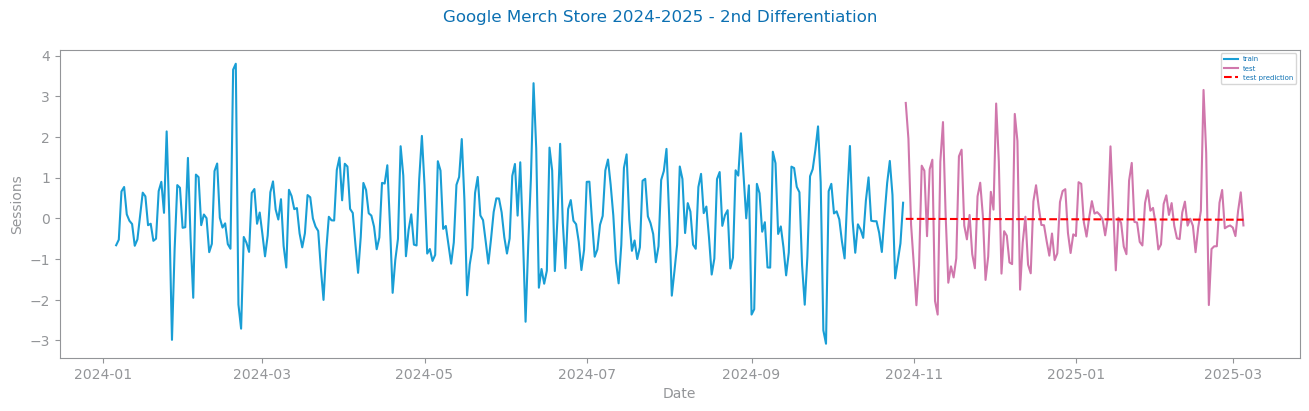

In [10]:
plot_forecasting_series(
    train_2[target],
    test_2[target],
    prd_tst_2,
    title=f"{file_tag} - 2nd Differentiation",
    xlabel='Date',
    ylabel=target,
)

# Approach uplift comparison

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calculate performance metrics for each model
metrics = {
    "Model": ["No Differentiation","1st Differentiation", "2nd Differentiation"],
    "MAE": [
        mean_absolute_error(test_0[target], prd_tst_0),
        mean_absolute_error(test_1[target], prd_tst_1),
        mean_absolute_error(test_2[target], prd_tst_2),

    ],
    "MSE": [
        mean_squared_error(test_0[target], prd_tst_0),
        mean_squared_error(test_1[target], prd_tst_1),
        mean_squared_error(test_2[target], prd_tst_2),
        
    ],
    "RMSE": [
        mean_squared_error(test_0[target], prd_tst_0, squared=False),
        mean_squared_error(test_1[target], prd_tst_1, squared=False),
        mean_squared_error(test_2[target], prd_tst_2, squared=False),
        
    ],
    "R²": [
        r2_score(test_0[target], prd_tst_0),
        r2_score(test_1[target], prd_tst_1),
        r2_score(test_2[target], prd_tst_2),
        
    ],
    "MAPE": [
        mean_absolute_percentage_error(test_0[target], prd_tst_0),
        mean_absolute_percentage_error(test_1[target], prd_tst_1),
        mean_absolute_percentage_error(test_2[target], prd_tst_2),
        
    ]
}

# Create a DataFrame to display the metrics
performance_df = pd.DataFrame(metrics)
print(performance_df)

                 Model       MAE       MSE      RMSE        R²          MAPE
0   No Differentiation  1.541014  3.038351  1.743087 -1.559477  3.118706e+02
1  1st Differentiation  0.510463  0.611358  0.781894 -0.000065  5.368562e+07
2  2nd Differentiation  0.770712  1.059927  1.029528  0.000050  1.037845e+02


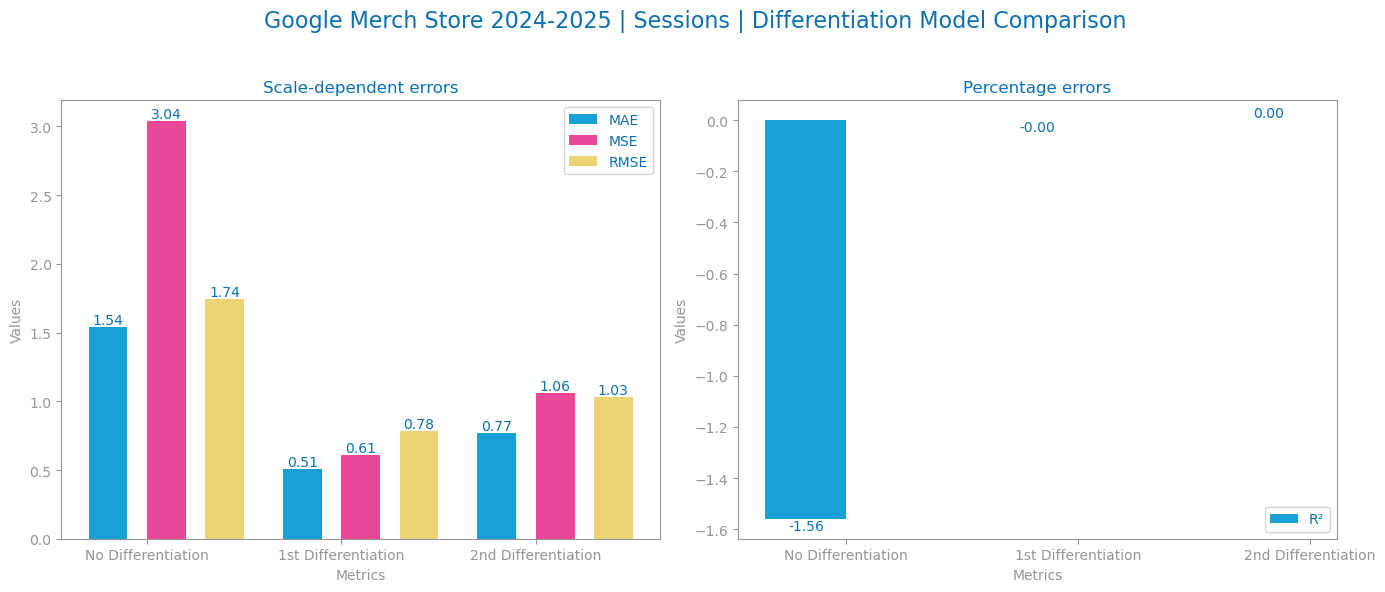

In [16]:
plot_performance_metrics(metrics, title=f"{file_tag} | {target} | Differentiation Model Comparison")

# save to csv

In [17]:
if test_data==False:
    

    data_save=data.copy()

    # apply winning strategy
    data_save=apply_strategy_1(data_save)

    data_save.reset_index(inplace=True)
    
        
    data_save.to_csv(f"data/df_merch_0_2024_agg_time_diff_input.csv", index=False)
    

    print(data_save.columns)

Index(['Date', 'Sessions', 'Seven-day active users', '28-day active users',
       'Events per session', 'Add to baskets', 'Checkouts',
       'E-commerce purchases', 'Average purchase revenue', 'Purchase revenue',
       'Average session duration', 'ARPU', 'ARPPU', 'Views per user',
       'Total users', 'Promotion views', 'Promotion clicks', 'Sessions Mobile',
       'Seven-day active users Mobile', '28-day active users Mobile',
       'New users Mobile', 'Scrolled users Mobile', 'Engaged sessions Mobile',
       'Views Mobile', 'Event count Mobile', 'Events per session Mobile',
       'Item-list view events Mobile', 'Item view events Mobile',
       'Add to baskets Mobile', 'Checkouts Mobile',
       'E-commerce purchases Mobile', 'Average purchase revenue Mobile',
       'Purchase revenue Mobile', 'First time purchasers Mobile',
       'Average session duration Mobile', 'Sessions (not set)',
       'Sessions affiliate', 'Sessions cpc', 'Sessions cpm', 'Sessions email',
       'Sess